In [1]:
import streamlit as st
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df = df.replace(to_replace='not current', value = 'former')

In [7]:
df = df.replace(to_replace='ever', value = 'former')

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

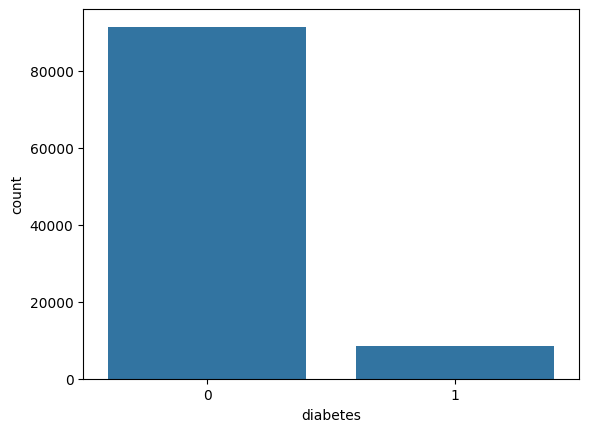

In [10]:
sns.countplot(data=df,x='diabetes')

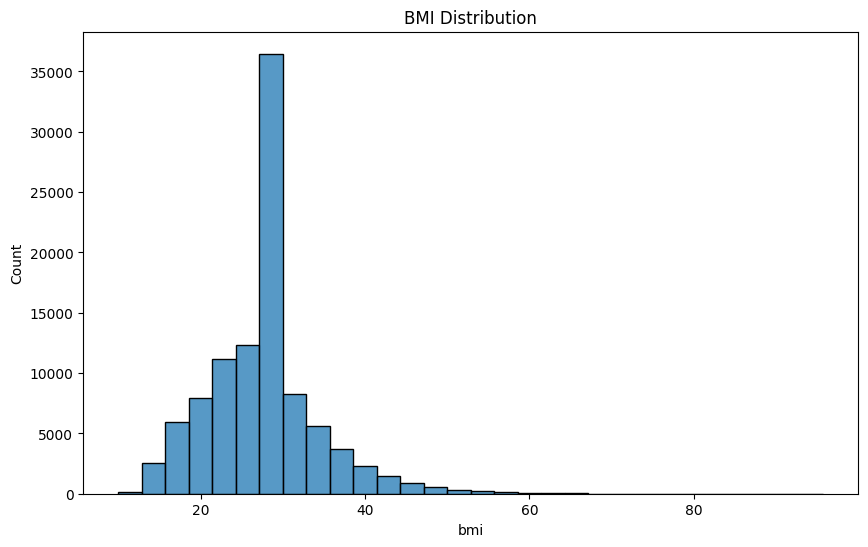

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=False,bins=30)
plt.title('BMI Distribution')
plt.show()

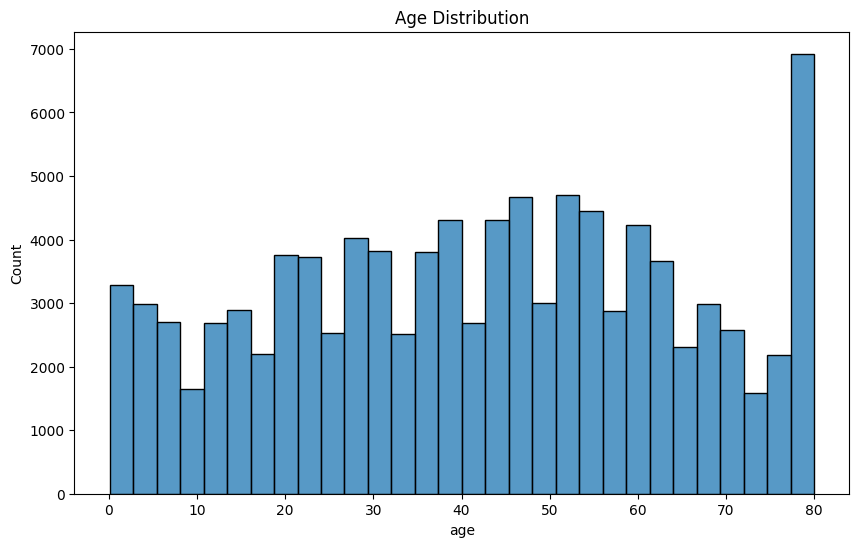

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=False,bins=30)
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='heart_disease', ylabel='count'>

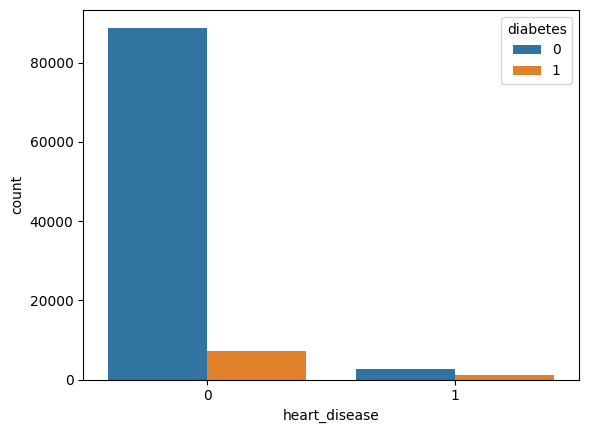

In [13]:
sns.countplot(data=df,x='heart_disease',hue='diabetes')

<Axes: >

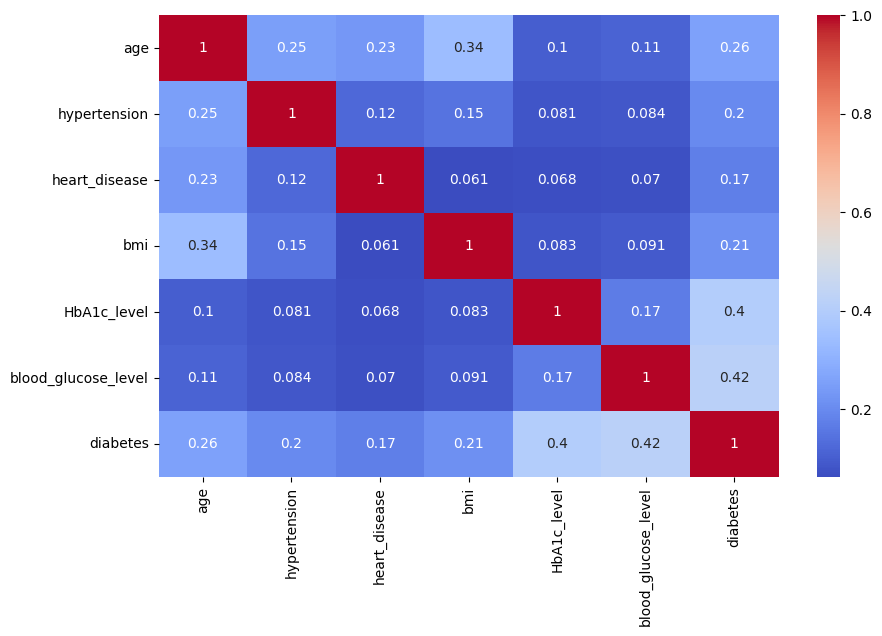

In [14]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,cmap='coolwarm',annot=True)

## Data Preprocessing

In [15]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

## Scale Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [23]:
log_predictions = log_model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
log_model.score(X_train,y_train)

0.9602571428571428

In [26]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27475
           1       0.87      0.63      0.73      2525

    accuracy                           0.96     30000
   macro avg       0.92      0.81      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,log_predictions)

array([[27238,   237],
       [  944,  1581]], dtype=int64)

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
rfc.score(X_train,y_train)

0.9993

In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27475
           1       0.94      0.68      0.79      2525

    accuracy                           0.97     30000
   macro avg       0.95      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000



In [33]:
print(confusion_matrix(y_test,rfc_pred))

[[27357   118]
 [  810  1715]]


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400],
}

In [36]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [37]:
CV_rfc.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [38]:
rfc = RandomForestClassifier(n_estimators=200,max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [39]:
rfc_pred = rfc.predict(X_test)

In [40]:
rfc.score(X_train,y_train)

0.9724285714285714

In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27475
           1       1.00      0.66      0.80      2525

    accuracy                           0.97     30000
   macro avg       0.98      0.83      0.89     30000
weighted avg       0.97      0.97      0.97     30000



In [42]:
print(confusion_matrix(y_test,rfc_pred))

[[27473     2]
 [  846  1679]]


## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
error_rate = []

for i in range(1,40):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

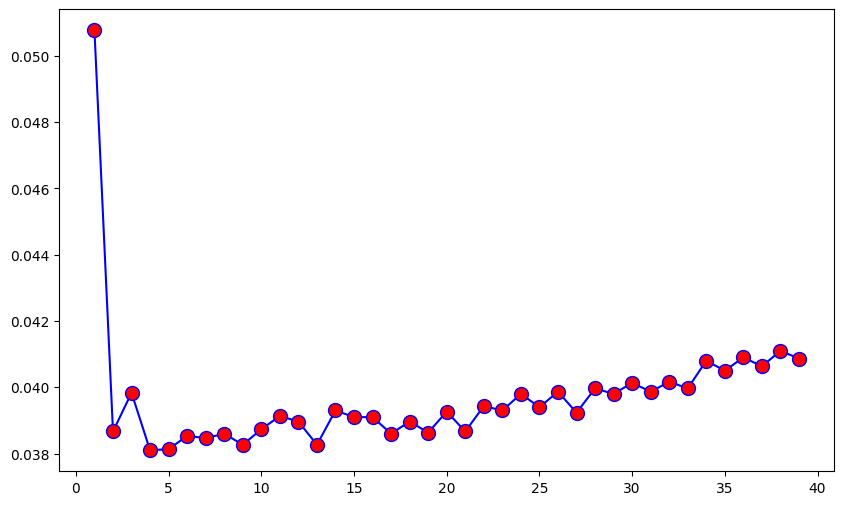

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='o',
         markerfacecolor='red', markersize=10)

In [46]:
knn = KNeighborsClassifier(n_neighbors=7)


In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [48]:
knn_pred = knn.predict(X_test)

In [49]:
knn.score(X_train,y_train)

0.9672428571428572

In [50]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27475
           1       0.92      0.60      0.72      2525

    accuracy                           0.96     30000
   macro avg       0.94      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [51]:
print(confusion_matrix(y_test,knn_pred))

[[27336   139]
 [ 1015  1510]]
